In [1]:
import random
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
from lab5_func import *
from math import log
from kaucherpy_master.src.kaucher.Kaucher import *

# Корреляция

In [2]:
matrix_path = './gradient/A.txt'
solution_path = './gradient/sol.txt'
b_path = './gradient/b.txt'

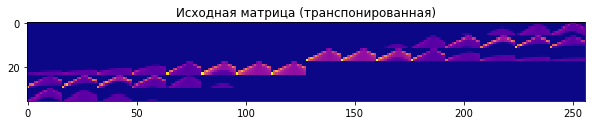

In [64]:
matrix = np.loadtxt(matrix_path)
sol = np.loadtxt(solution_path)
b = np.loadtxt(b_path)

plt.figure(figsize=(10,3))
plt.imshow(matrix.T, cmap='plasma')
plt.title('Исходная матрица (транспонированная)')
plt.savefig('matrix')

<Figure size 720x432 with 0 Axes>

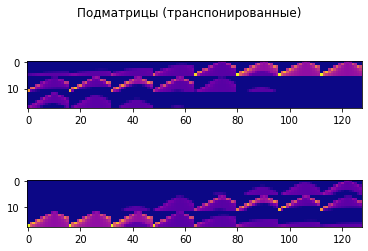

In [65]:
m1 = matrix[:128, 18:]
m2 = matrix[128:, :18]

b1 = b[:128]
b2 = b[128:]

plt.figure(figsize=(10,6))
fig, axs = plt.subplots(2)
axs[0].imshow(m1.T, cmap='plasma')
axs[1].imshow(m2.T, cmap='plasma')
plt.suptitle('Подматрицы (транспонированные)')
plt.savefig('sub_matrix')
plt.show()

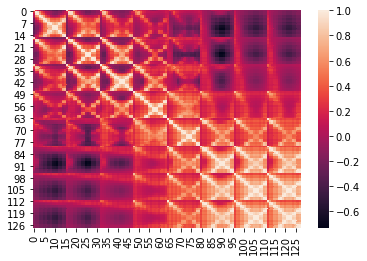

In [5]:
df = pd.DataFrame(data=m1.T)
corrMatrix = df.corr()
sns.heatmap(corrMatrix)
plt.savefig('corr_all')
plt.show()
#0-46

In [6]:
df = pd.DataFrame(data=m1)
df['sum']  = df.sum(axis=1)
df = df.sort_values(by='sum')
summary = df['sum']
s = df.iloc[:, 0:18].to_numpy()
df = pd.DataFrame(data=s)
df['sum']  = df.sum(axis=1)
df
summary = summary.to_numpy()


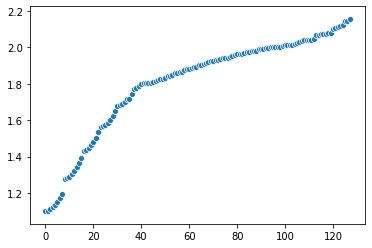

In [7]:
sns.scatterplot(data=summary)
plt.savefig('sum_all')

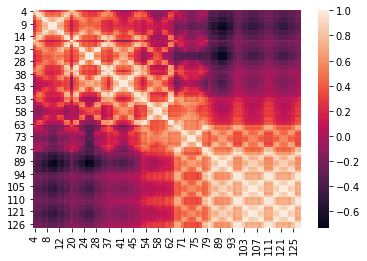

In [8]:
df = pd.DataFrame(data=m1.T)
df.drop([col for col, val in df.sum().iteritems() if val < 1.8], axis=1, inplace=True)
corrMatrix = df.corr()
sns.heatmap(corrMatrix)
# sns.heatmap(df.T)


In [93]:
summary[-16]

2.0461096755727635

In [114]:
k = 18
df = pd.DataFrame(data=m1.T)
df.drop([col for col, val in df.sum().iteritems() if val < summary[-k]], axis=1, inplace=True)
new_m = df.T.to_numpy()
new_m = np.vstack([new_m.T[:12], new_m.T[13:]]).T
new_m = np.vstack([new_m[:12], new_m[13:]])
# new_m.shape
df

,23,24,25,26,27,28,29,40,41,42,43,44,56,57,58,59,60,74
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.228173
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027621,0.048608,0.053898,0.042211,0.170549
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001761,0.000733,0.181665,0.178108,0.172988,0.176691,0.190515,0.170524
3,0.000000,0.000000,0.000757,0.011759,0.018695,0.021733,0.020674,0.143298,0.159181,0.171059,0.177729,0.183891,0.183163,0.175531,0.172982,0.174729,0.180869,0.170517
4,0.157785,0.171013,0.181291,0.179583,0.180470,0.183901,0.190066,0.182135,0.177637,0.176012,0.176952,0.180406,0.178931,0.174534,0.172980,0.173965,0.177441,0.170515
5,0.188986,0.183825,0.180780,0.179582,0.180078,0.182203,0.185970,0.180096,0.177137,0.176011,0.176567,0.178741,0.176928,0.174042,0.172978,0.173586,0.175803,0.170514
6,0.000000,0.000000,0.293485,0.359001,0.308824,0.000000,0.000000,0.000000,0.287571,0.351862,0.302803,0.000000,0.000000,0.282547,0.345800,0.297692,0.000000,0.112700
7,0.390455,0.478137,0.229283,0.188816,0.249314,0.552397,0.458722,0.581619,0.386994,0.352093,0.377328,0.601785,0.571387,0.352613,0.297419,0.317061,0.549683,0.170549
8,0.253715,0.203044,0.185003,0.179592,0.183298,0.197451,0.292562,0.397848,0.335822,0.328055,0.357687,0.386664,0.209184,0.178108,0.172988,0.176691,0.190515,0.170524
9,0.205878,0.190304,0.181570,0.167826,0.162569,0.165720,0.178534,0.046818,0.019471,0.004956,0.009721,0.073023,0.183163,0.175531,0.172982,0.174729,0.180869,0.170517


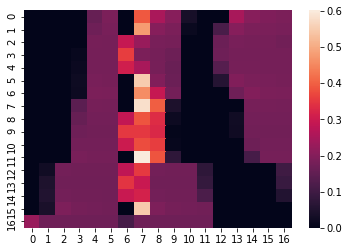

In [115]:
sns.heatmap(new_m)
# print(np.linalg.det(new_m))

(17, 17) (17,) (17,)


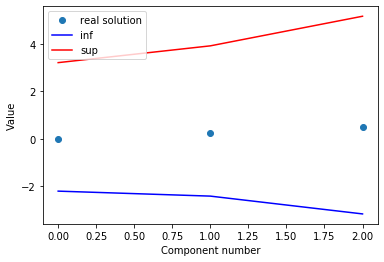

In [116]:
idx=[23,24,25,26,27,28,29,40,41,42,43,44,56,57,58,59,60,74]
sub_b = b1[idx]
sub_b = np.hstack([sub_b[:12], sub_b[13:18]])
sub_sol = np.hstack([sol[:12], sol[13:18]])
b_radius = np.full((sub_b.shape[0]), 0.5)
b_low, b_high = sub_b - b_radius,sub_b + b_radius

print(new_m.shape, b_low.shape, sub_sol.shape)
(x_inf, x_sup), x_seq, cur_iter, norm_list = subdiff2(new_m, new_m, b_low, b_high)

plot_real_vs_solve(sub_sol[:3], x_inf[:3], x_sup[:3], 'tr', save=False) 

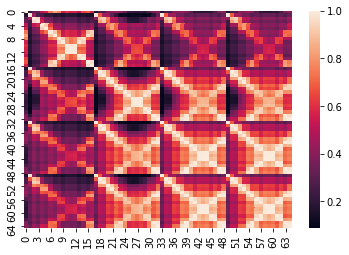

In [11]:
df = pd.DataFrame(data=m1[63:].T)
corrMatrix = df.corr()
sns.heatmap(corrMatrix)
plt.show()

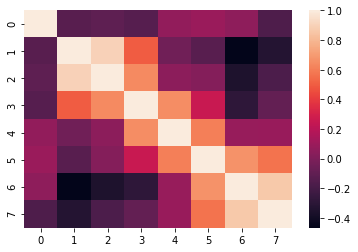

In [12]:
idx = [i*15 for i in range(8)]
df = pd.DataFrame(data=m1[idx].T)
corrMatrix = df.corr()
sns.heatmap(corrMatrix)
plt.show()

In [13]:
new_m = df.T.to_numpy()
new_m = np.vstack([new_m.T[:12], new_m.T[14:]]).T
new_m = np.vstack([new_m[:12], new_m[14:]])
new_m.shape


(8, 16)

In [74]:
df = pd.DataFrame(data=m1)
for i in range(114):
    corrMatrix = df.corr() ** 2
    df['sum'] = df.sum(axis=1)
    idx = df['sum'].idxmax()
#     print(idx)
    df.drop([idx], inplace=True)
    df.drop(['sum'],  axis=1, inplace=True)
#     print(df)

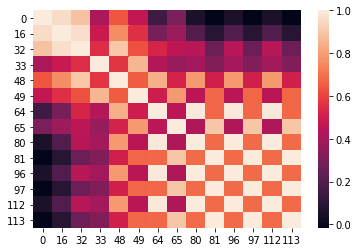

In [75]:
corrMatrix = df.T.corr()
sns.heatmap(corrMatrix)
# plt.show()
plt.savefig('sub_corr_m1')
# sns.heatmap(df)
# plt.savefig('sub_m1')

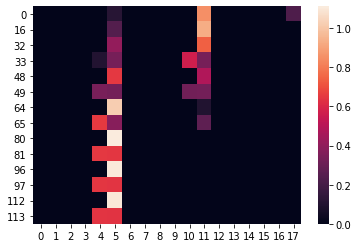

In [76]:
sns.heatmap(df)

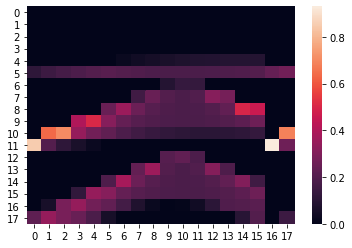

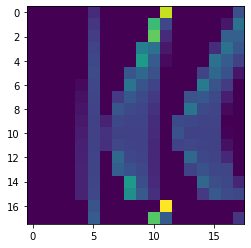

In [72]:
df = pd.DataFrame(data=m1)
corrMatrix = df.corr() ** 2
df['sum'] = df.sum(axis=1)
# df
df.sort_values(by='sum')
s = df.iloc[0:18, 0:18].to_numpy()
sns.heatmap(s.T)
plt.show()
plt.imshow(s)
# df
#     print(df)

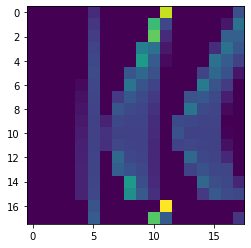

In [17]:
plt.imshow(s)

In [18]:
idx = [16*i + 3 for i in range(8)]
idx += [16*i + 4 for i in range(8)]

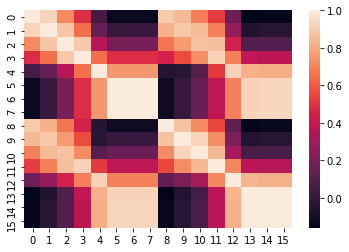

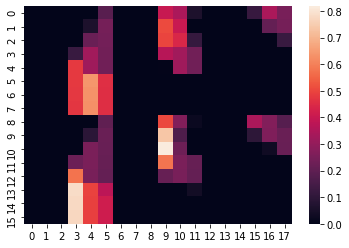

In [19]:
df = pd.DataFrame(data=m1[idx].T)
corrMatrix = df.corr()
sns.heatmap(corrMatrix)
plt.show()
sns.heatmap(m1[idx])

 # Выбор количества переменных и выбор строк

In [20]:
from itertools import combinations
import time
from math import fabs

In [ ]:
arr = np.array([[1,2,3], [4,5,6], [7,8,9]])
row = [0, 2]
col = [0,2]
arr[list(row)].T[list(col)].T

In [35]:
row_fix = [0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12]
k = 15

fix_k = len(row_fix)
combs1 = combinations(range(fix_k, 128), k - fix_k)
combs2 = combinations(range(0, 18), k)
max_det = -1
max_comb1 = []
max_comb2 = []
i = 0

start_time = time.time()
for row in combs1:
    i += 1
    for col in combs2:
        
            
        sub_m = m1[list(row) + row_fix].T[list(col)].T
        det = fabs(np.linalg.det(sub_m))

        if  det > max_det:
            max_det = det
            max_comb1 = row
            max_comb2 = col
    if i % 10000000 == 0:
        print(i)
print('k = ', k)
print("--- %s seconds ---" % (time.time() - start_time))
print('max_det = ', max_det)
print('max_comb1 = ', max_comb1)
print('max_comb2 = ', max_comb2)

k =  15
--- 0.024933815002441406 seconds ---
max_det =  0.0
max_comb1 =  (13, 14)
max_comb2 =  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)


In [39]:
# row_fix = [0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12]
row_fix = [0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12]
k = 15
col_fix = [4, 5, 6,7,8,9,10,11,12,13,14,15,16,17]

m = len(col_fix)
fix_k = len(row_fix)

combs1 = combinations(range(fix_k, 128), k - fix_k)
combs2 = combinations(range(0, 18 - m), k - m )
max_det = -1
max_comb1 = []
max_comb2 = []
i = 0

start_time = time.time()
for row in combs1:
    i += 1
    for col in combs2:
        
            
        sub_m = m1[list(row) + row_fix].T[list(col) + col_fix].T
        det = fabs(np.linalg.det(sub_m))
        print(det)
        if  det > max_det:
            max_det = det
            max_comb1 = row
            max_comb2 = col
    if i % 10000000 == 0:
        print(i)
print('k = ', k)
print("--- %s seconds ---" % (time.time() - start_time))
print('max_det = ', max_det)
print('max_comb1 = ', max_comb1)
print('max_comb2 = ', max_comb2)

0.0
0.0
0.0
0.0
k =  15
--- 0.002991199493408203 seconds ---
max_det =  0.0
max_comb1 =  (13, 14)
max_comb2 =  (0,)



[0,1,2,3,4,5,6,7,8,9,10,11]
 
k =  14
--- 0.12067580223083496 seconds ---
max_det =  3.4195006383438334e-18
max_comb1 =  (12, 13)
max_comb2 =  (4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17)

k =  15
--- 0.11269760131835938 seconds ---
max_det =  0.0
max_comb1 =  (12, 13, 14)
max_comb2 =  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)

k =  16
--- 2.534222364425659 seconds ---
max_det =  0.0
max_comb1 =  (12, 13, 14, 15)
max_comb2 =  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)

k =  17
--- 55.6719331741333 seconds ---
max_det =  0.0
max_comb1 =  (12, 13, 14, 15, 16)
max_comb2 =  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)

--- 50.70370125770569 seconds ---
max_det =  0.0
max_comb1 =  (13, 14, 15, 16, 17)
max_comb2 =  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17)

[0,1,2,3,4,5]

k =  7
--- 0.8839404582977295 seconds ---
max_det =  0.00024442807251449683
max_comb1 =  (6,)
max_comb2 =  (8, 9, 10, 11, 14, 15, 16)

k =  8
--- 1.311131238937378 seconds ---
max_det =  5.864710475208971e-05
max_comb1 =  (5, 6, 7)
max_comb2 =  (8, 9, 10, 11, 13, 14, 15, 16)

k =  9
--- 4.282927989959717 seconds ---
max_det =  4.651451797203545e-07
max_comb1 =  (5, 6, 7, 8)
max_comb2 =  (7, 8, 9, 10, 11, 13, 14, 15, 16)

k =  10
--- 4.20375657081604 seconds ---
max_det =  9.771605369919611e-08
max_comb1 =  (6, 7, 8, 9)
max_comb2 =  (7, 8, 9, 10, 11, 12, 13, 14, 15, 16) 


k =  11
--- 67.05079078674316 seconds ---
max_det =  3.0936810064310248e-09
max_comb1 =  (6, 7, 8, 9, 10)
max_comb2 =  (6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)

k =  12
--- 1647.5549364089966 seconds ---
max_det =  1.6228934948206193e-11
max_comb1 =  (6, 7, 8, 9, 10, 11)
max_comb2 =  (6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17)


k =  3
--- 0.22040963172912598 seconds ---
max_det =  0.038965580101227415
max_comb1 =  (0, 1, 2)
max_comb2 =  (10, 11, 17)


k = 4 
3.938624858856201 seconds
max_det = 0.04759392266761848
max_comb1 = (0, 1, 2, 3)
max_comb2 = (9, 10, 11, 16)


k =  5
--- 92.64458155632019 seconds ---
max_det =  0.0045845728981722044
max_comb1 =  (0, 1, 2, 3, 4)
max_comb2 =  (9, 11, 15, 16, 17)


k =  6
--- 2246.3276426792145 seconds ---
max_det =  0.002317864143093447
max_comb1 =  (0, 1, 2, 3, 4, 5)
max_comb2 =  (8, 9, 10, 11, 15, 16)



In [43]:
combs2 = np.array([[10, 11, 17], [9, 10, 11, 16], [9, 11, 15, 16, 17], [8, 9, 10, 11, 15, 16], 
         [8, 9, 10, 11, 14, 15, 16], [8, 9, 10, 11, 13, 14, 15, 16], [7, 8, 9, 10, 11, 13, 14, 15, 16], 
         [7, 8, 9, 10, 11, 12, 13, 14, 15, 16 ], [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 
         [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 
         [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [44]:
i = 3
dict_result = {}
for col in combs2:
    row = [j for j in range(i)]
    sub_m = m1[row].T[col].T
    sub_b = b1[row]
    sub_sol = sol[col]
    b_radius = np.full((sub_b.shape[0]), 0.5)
    b_low, b_high = sub_b - b_radius,sub_b + b_radius
    (x_inf, x_sup), x_seq, cur_iter, norm_list = subdiff2(sub_m, sub_m, b_low, b_high)
    dict_result[i] = [(x_inf, x_sup), x_seq, cur_iter, norm_list]
    i += 1
        

In [89]:
def plot_real_vs_solve(x_real, x_inf, x_sup, name, save=False):
    plt.plot(x_real, 'o', label='real solution')
    plt.plot(x_inf, 'b-', label='inf')
    plt.plot(x_sup, 'r-', label='sup')
    plt.legend()
    plt.xlabel('Component number')
    plt.ylabel('Value')
#     plt.title('Исследование для n = ' + name + 'переменных')
    if save:
        filename = 'real_vs_solve_' + name
        plt.savefig(filename)
    plt.show()
    plt.close()

3


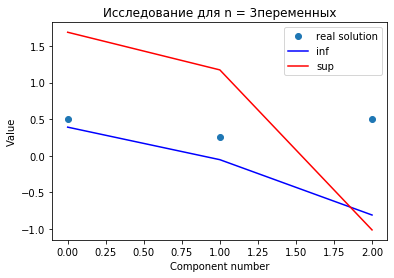

4


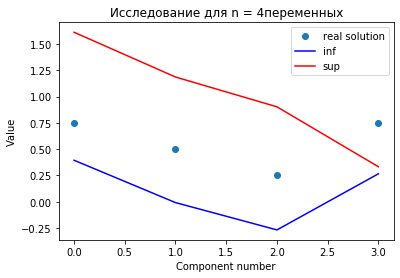

5


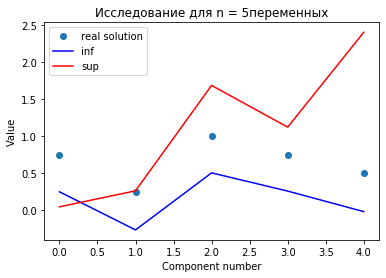

6


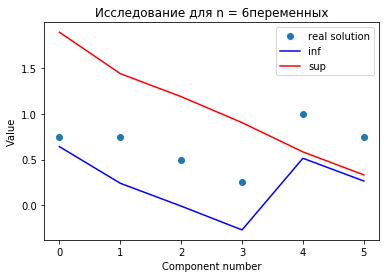

7


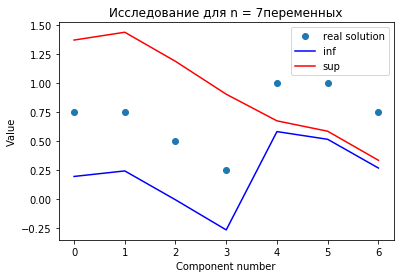

8


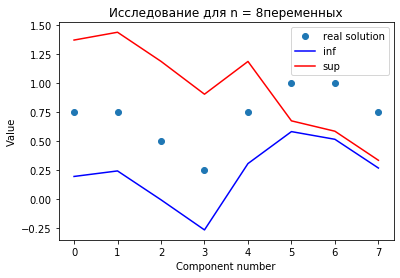

9


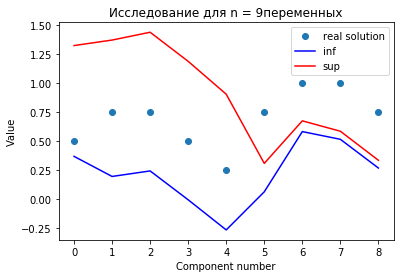

10


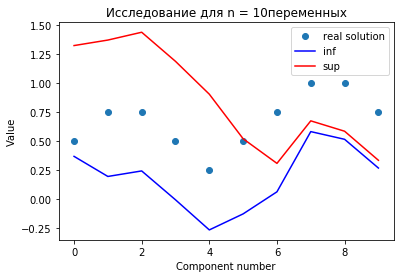

11


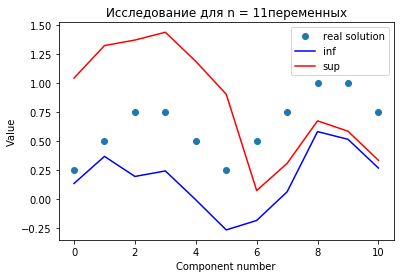

12


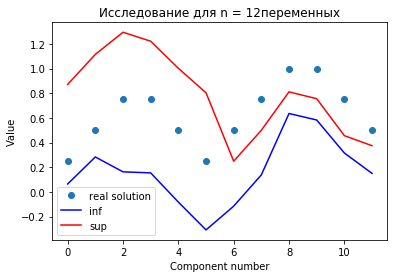

13


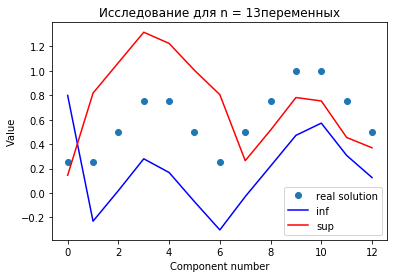

14


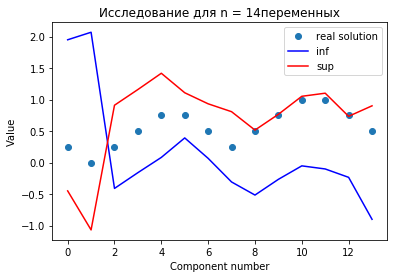

In [25]:
i = 3
for key, col in zip(dict_result, combs2):
    (x_inf, x_sup), x_seq, cur_iter, norm_list = dict_result[key]
    print(key)
    sub_sol = sol[col]
    plot_real_vs_solve(sub_sol, x_inf, x_sup, str(i), True)
    i += 1
    

In [31]:
def plot_solution(mtx_inf, mtx_sup, x_inf, x_sup, inf_b, sup_b, filename = None):
    n = mtx_inf.shape[0]
    mtx_interval = [[Kaucher(mtx_inf[i,j], mtx_sup[i,j]) for j in range(n)] for i in range(n)]
    x_interval = [Kaucher(x_inf[i], x_sup[i]) for i in range(n)]
    b_interval = [sum([mtx_interval[i][j] * x_interval[j] for j in range(n)]) for i in range(n)]
    inf_b_sol = np.array([comp.lower for comp in b_interval])
    sup_b_sol = np.array([comp.upper for comp in b_interval])
    plt.plot(inf_b, label='inf(b)')
    plt.plot(sup_b, label='sup(b)')
    
    plt.plot(inf_b_sol, label='inf(Ax_sol)', linestyle='--')
    plt.plot(sup_b_sol, label='sup(Ax_sol)', linestyle='--')
    
    mid_Ax = (inf_b_sol + sup_b_sol) / 2
    plt.plot(mid_Ax, label='mid(Ax)')
    plt.legend()
    plt.title(filename)
    if filename is not None:
        plt.savefig(filename)
    plt.show()
#     plt.close()

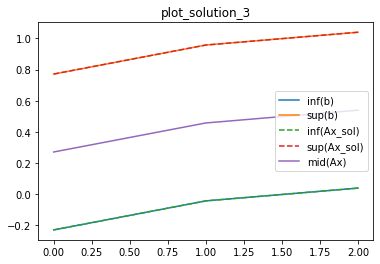

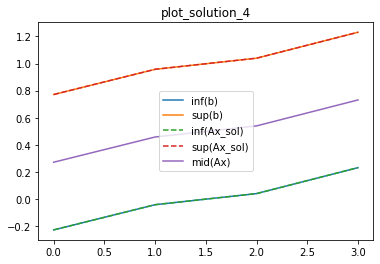

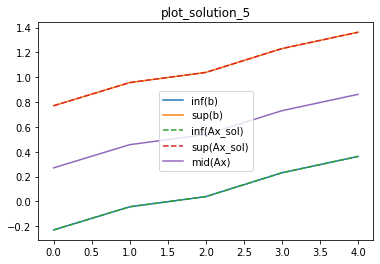

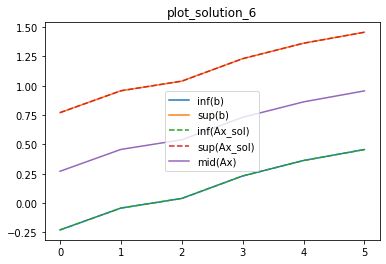

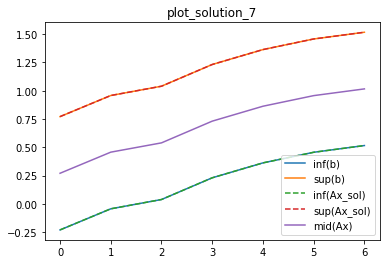

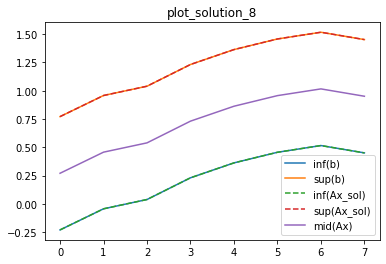

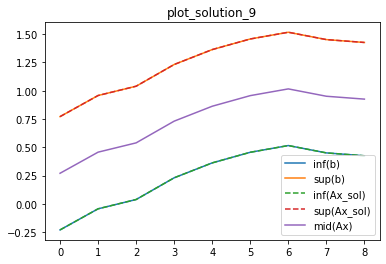

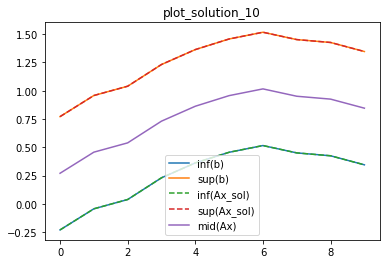

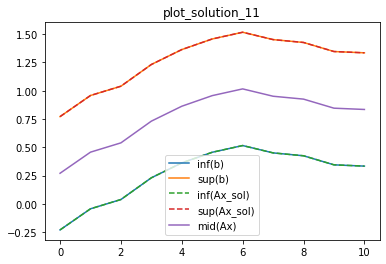

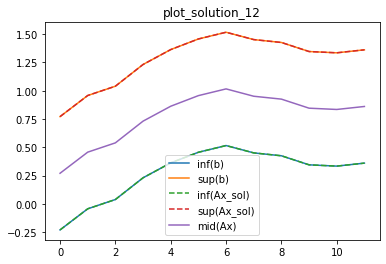

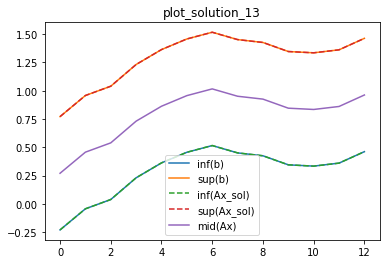

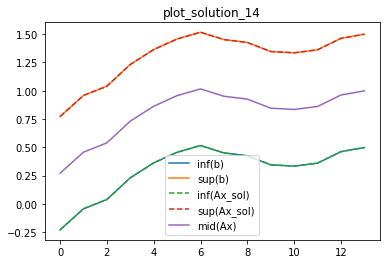

In [33]:
i = 3
dict_result = {}
for col in combs2:
    row = [j for j in range(i)]
    sub_m = m1[row].T[col].T
    sub_b = b1[row]
    sub_sol = sol[col]
    b_radius = np.full((sub_b.shape[0]), 0.5)
    b_low, b_high = sub_b - b_radius,sub_b + b_radius
    (x_inf, x_sup), x_seq, cur_iter, norm_list = subdiff2(sub_m, sub_m, b_low, b_high)
    dict_result[i] = [(x_inf, x_sup), x_seq, cur_iter, norm_list]

    plot_solution(sub_m, sub_m, x_inf, x_sup, b_low, b_high, 'plot_solution_' + str(i))
    i += 1
        

(3, 3)


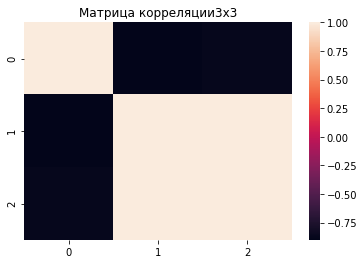

(4, 4)


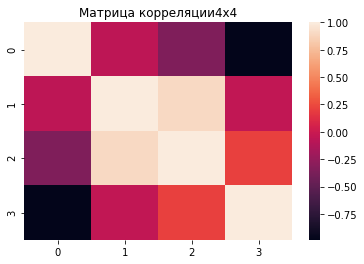

(5, 5)


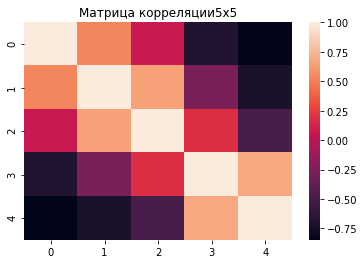

(6, 6)


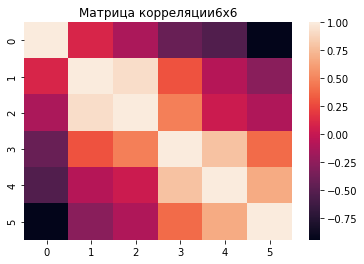

(7, 7)


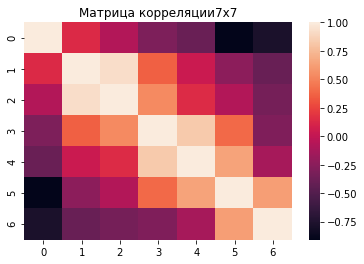

(8, 8)


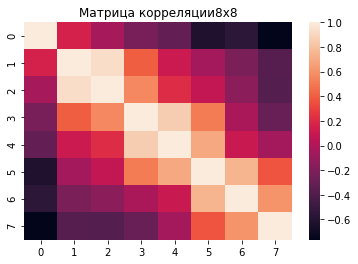

(9, 9)


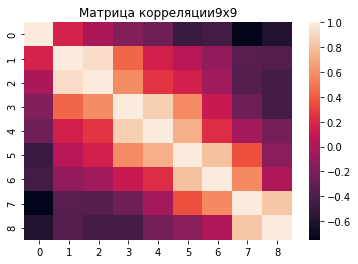

(10, 10)


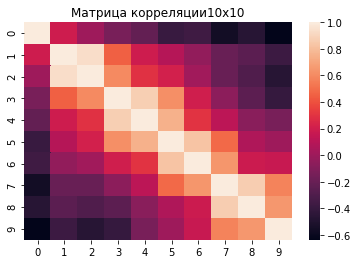

(11, 11)


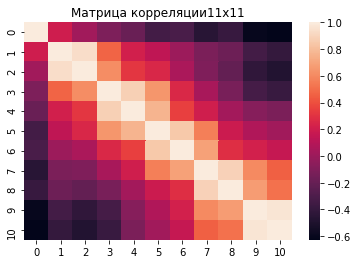

(12, 12)


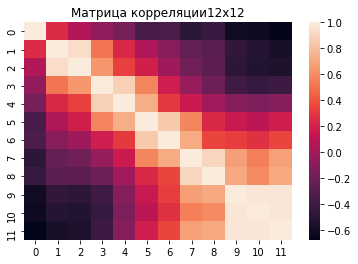

(13, 13)


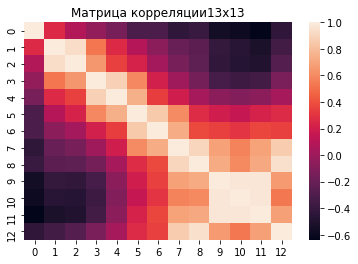

(14, 14)


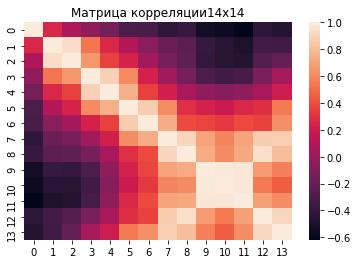

In [49]:
i = 3
for col in combs2:
    row = [j for j in range(i)]
    sub_m = m1[row].T[col].T
    sub_b = b1[row]
    sub_sol = sol[col]
    print(sub_m.shape)
    
    df = pd.DataFrame(data=sub_m.T)
    corrMatrix = df.corr()
    sns.heatmap(corrMatrix)
    title = 'Матрица корреляции' + str(i) + 'x' + str(i)
    plt.title(title)
    plt.savefig(title)
    plt.show()
    i += 1
    

        

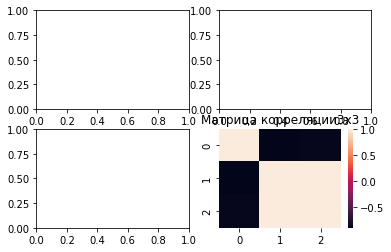

AttributeError: 'AxesSubplot' object has no attribute 'heatmap'

In [52]:
fig, axs = plt.subplots(nrows=2, ncols=2)
j = 0
i = 3
for col in combs2:
    row = [j for j in range(i)]
    sub_m = m1[row].T[col].T  
    df = pd.DataFrame(data=sub_m.T)
    corrMatrix = df.corr()
    sns.heatmap(corrMatrix)
    title = 'Матрица корреляции' + str(i) + 'x' + str(i)
    plt.title(title)
    plt.savefig(title)
    plt.show()
    i += 1
    axs[0][0].heatmap(m1.T)
    axs[1][1].heatmap(m2.T)